# 0. Procesado de datos

We begin importing the libraries and reading the data file, to begin preprocessing.

In [1]:
#Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from spellchecker import SpellChecker

#Importing the dataset
df = pd.read_csv('./data/train.csv')

In [2]:
#Visualizing the dataset
df

,label,text,id
0,0,"Hi Roy hope you are ok, Trans people are not gay. also the only thing thats being rammed down your throat is information about inequality, prejudice and the lack or recognition that 15,000 american trans soldiers have made a pledge that if needs be, they will sacrifice their life for the sake of others. Anyone who is able to join military services to support their country shouldn't be persecuted with such venom. Maybe more appreciation, more tolerance and acceptance and then less wars.",95e98db99c2
1,0,But fuckin' hell what even is biology,a87b8708e63
2,0,Whose the nice looking clergyman?,5b3cb03803f
3,1,"AIDS ARE IN YOUR WAY, SIN HAS CONSEQUENCES AND VERY BAD.",5b0bad2347e
4,0,to learn,332048bd188
...,...,...,...
8143,1,Yeah...if we still alive at the time of the next election. Anything can happen and fairly soon. UK is not safe either.,9141edf7189
8144,0,There is something fundamentally wrong with this,fde30735725
8145,1,"This always confused me. If homosexuality is ""no big deal"", which it isn't, why be proud of it? It's normal, so it isn't an accomplishment. So why celebrate it? I could care less, but I just don't get it.",3d3456b6659
8146,1,disgusting,eace075fe4d


In [3]:
#Checking nulls
df.isnull().sum()

label    0
text     0
id       0
dtype: int64

No nulls!

In [4]:
#Shape of the dataframe
df.shape

(8148, 3)

Text(0, 0.5, 'samples')

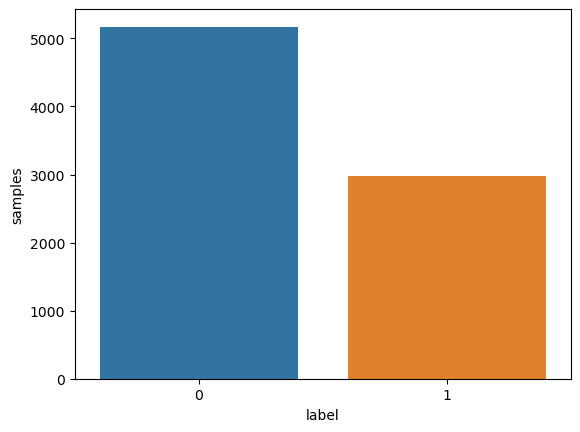

In [5]:
x = df.label.value_counts()
sns.barplot(x=x.index, y=x.values)
plt.gca().set_ylabel('samples')

It is quite unbalanced, there are a lot more non-offensive than offensive texts. Now we want the most common stopwords in the dataframe.

<BarContainer object of 10 artists>

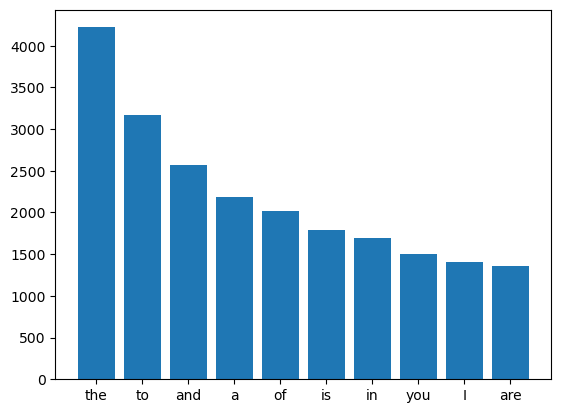

In [6]:
#We load the stopword dictionary and remove them from the text
nlp = spacy.load('en_core_web_lg')
en_stopwords = nlp.Defaults.stop_words

#Corpus function
def create_corpus(label):
    corpus=[]
    
    for x in df[df['label']==label]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

#Common stopwords in non-offensive texts
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus: 
    dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

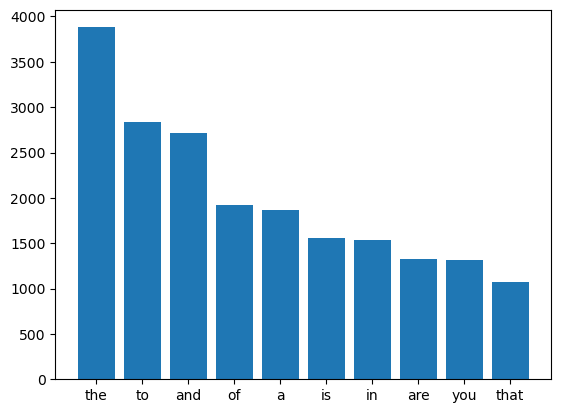

In [7]:
#Common stopwords in offensive tweets
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in en_stopwords:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

Stopwords in both types of texts are pretty similar and follow the same distribution. Now we follow analyzing the punctuation

<BarContainer object of 19 artists>

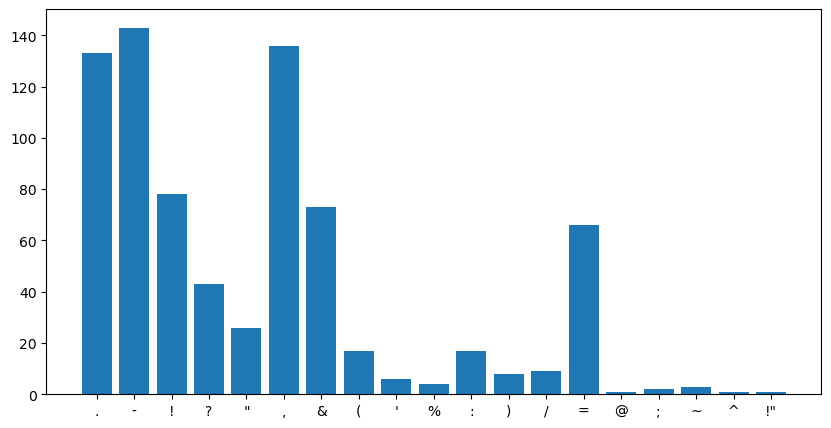

In [8]:
#Common punctuation in offensive texts
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 25 artists>

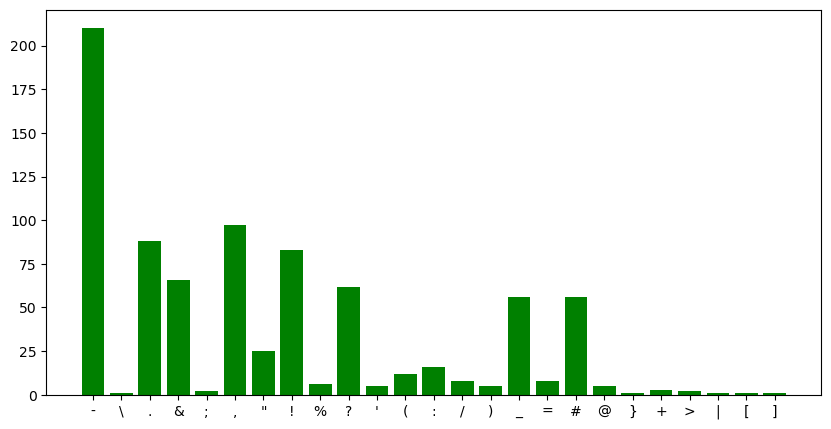

In [9]:
#Common punctuation in non-offensive texts
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

In this case, we see a huge difference! Periods, commas, equals, hashtags and are way more used in offensive tweets. We'll now analyze the dataframe removing unuseful elements.

In [18]:
#Function to correct spelling errors
def correct_spellings(text):
    spell = SpellChecker()
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(filter(None, corrected_text))
        
#Function to remove URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

#Function to remove emojis from the text
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Function to remove punctuation
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

#Function to remove stopwords from the text
def remove_stop_words(text):
    cleanText = ''
    phrase = nlp(text)
    for token in phrase:
        if not token.is_stop:
        #and not token.is_punct and not token.like_url:
            cleanText += ' ' + token.text
    return cleanText

#df['text']=df['text'].apply(lambda x : correct_spellings(x))
df['text']=df['text'].apply(lambda x : remove_URL(x))
#df['text']=df['text'].apply(lambda x : remove_emoji(x))
df['text']=df['text'].apply(lambda x : remove_punct(x))
df['text']=df['text'].apply(remove_stop_words)

In [19]:
df

,label,text,id
0,0,Hi Roy hope ok Trans people gay thing s rammed throat information inequality prejudice lack recognition 15000 american trans soldiers pledge needs sacrifice life sake able join military services support country persecuted venom Maybe appreciation tolerance acceptance wars,95e98db99c2
1,0,fuckin hell biology,a87b8708e63
2,0,nice looking clergyman,5b3cb03803f
3,1,AIDS WAY SIN CONSEQUENCES BAD,5b0bad2347e
4,0,learn,332048bd188
...,...,...,...
8143,1,Yeah alive time election happen fairly soon UK safe,9141edf7189
8144,0,fundamentally wrong,fde30735725
8145,1,confused homosexuality big deal proud normal accomplishment celebrate care,3d3456b6659
8146,1,disgusting,eace075fe4d


Now we analyze frequent words by label.

<BarContainer object of 10 artists>

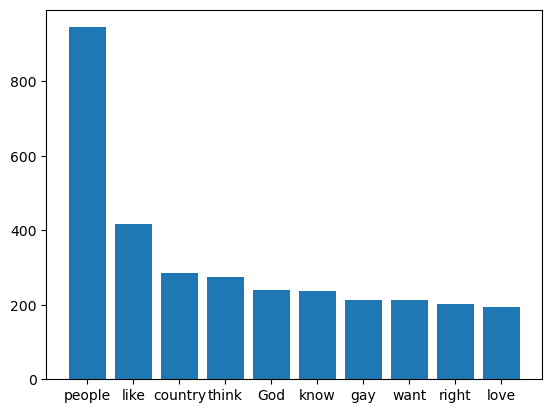

In [20]:
#Common words in non-offensive texts
corpus=create_corpus(0)

dic=defaultdict(int)

for word in corpus:
    dic[word]+=1  
    
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

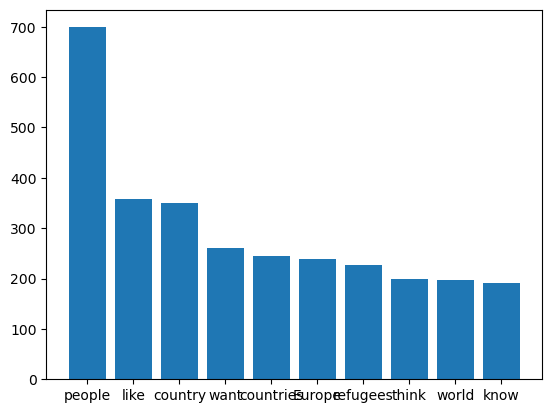

In [21]:
#Common words in offensive texts
corpus=create_corpus(1)

dic=defaultdict(int)

for word in corpus:
    dic[word]+=1  
    
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

a,z=zip(*top)
plt.bar(a,z)

Many repeated words between both.

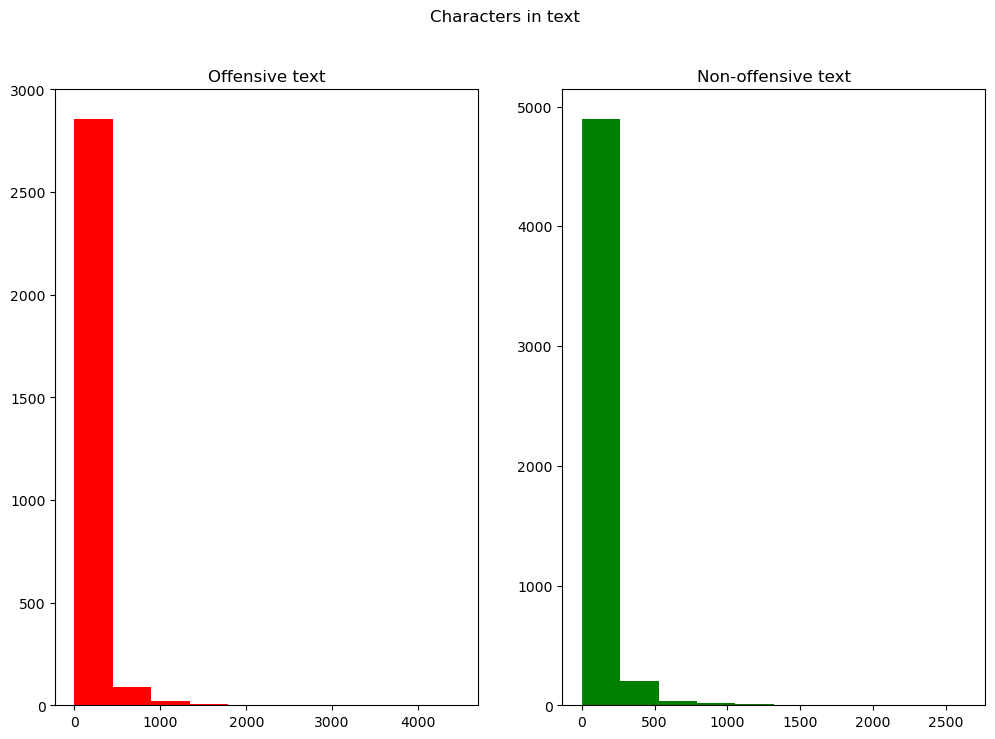

In [23]:
#Comparison of characters in a text between offensive and non-offensive texts
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['label']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Offensive text')
text_len=df[df['label']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Non-offensive text')
fig.suptitle('Characters in text')
plt.show()

There are a lot more characters in non-offensive than offensive texts

C:\Users\ivana\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ivana\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\ivana\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ivana\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(0.0, 450.0)

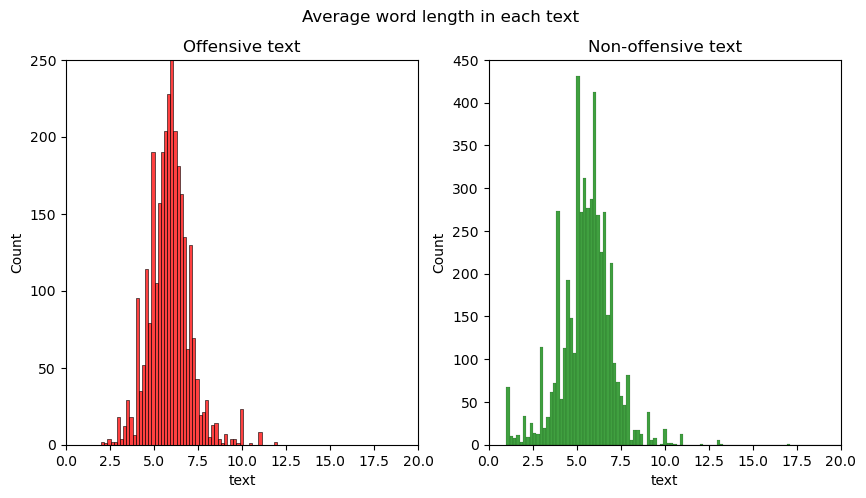

In [24]:
#Comparison between average word length in non-offensive and offensive texts
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['label']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Offensive text')
ax1.set_xlim(0, 20) 
ax1.set_ylim(0, 250)  
word=df[df['label']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Non-offensive text')
fig.suptitle('Average word length in each text')
ax2.set_xlim(0, 20) 
ax2.set_ylim(0, 450)

Almost same distribution! We'll now analyze most frquent unigrams, bigrams and trigrams in every text

In [25]:
#Function to get the most frquent n-grams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

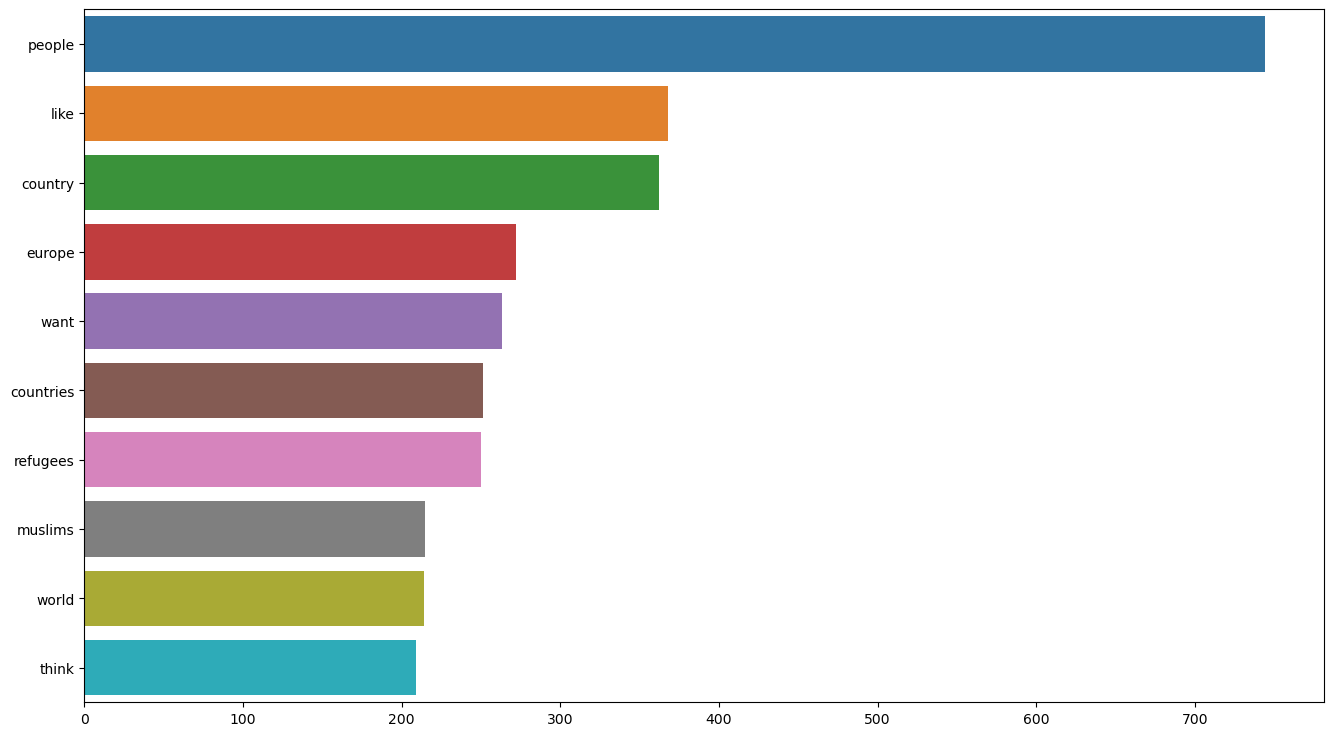

In [26]:
#Unigram analysis in offensive texts
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df[df['label']==1]['text'],10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<Axes: >

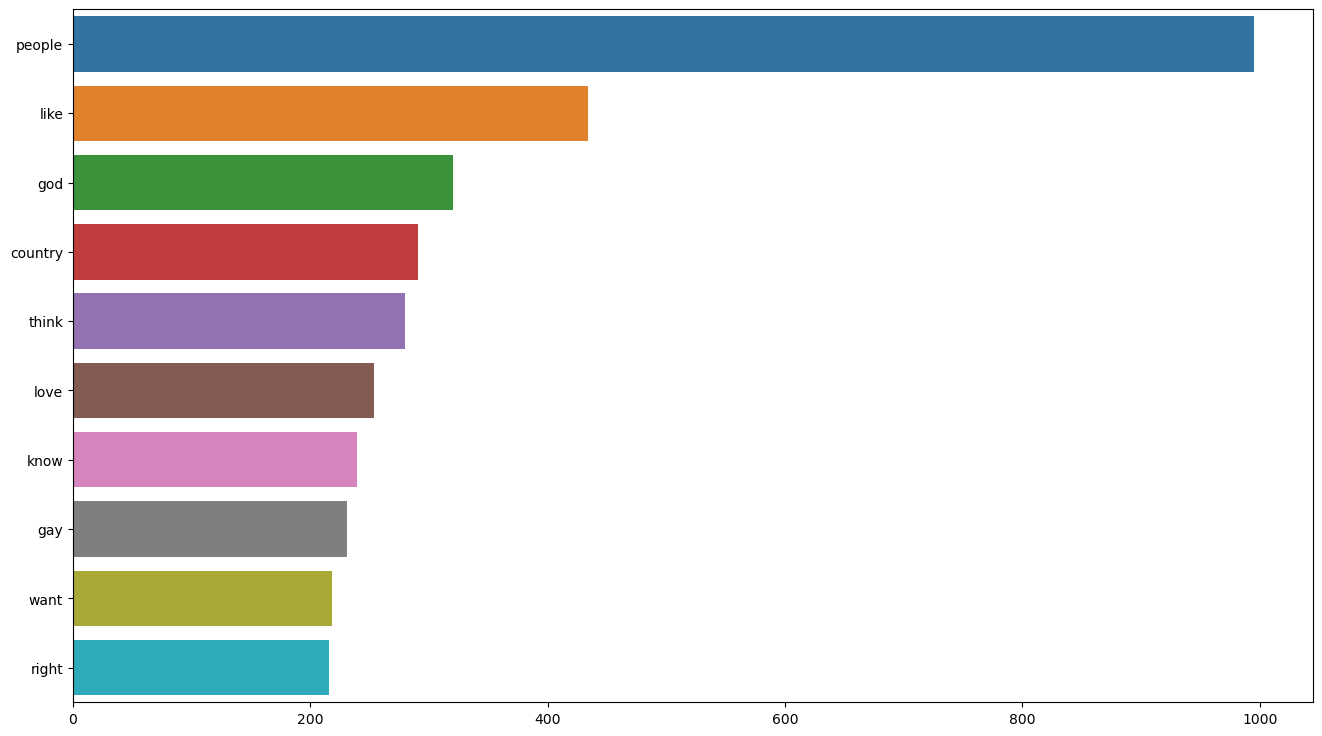

In [28]:
#Unigram analysis in non-offensive texts
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df[df['label']==0]['text'],10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<Axes: >

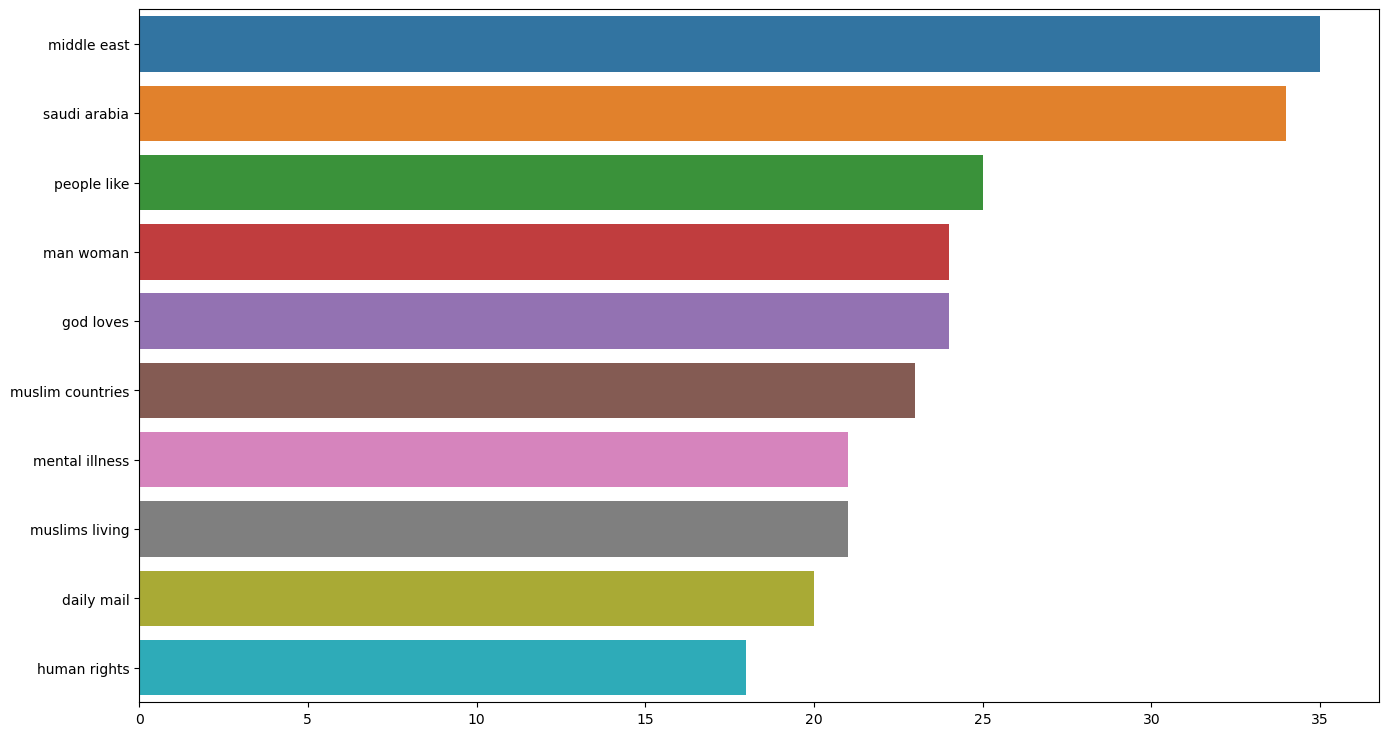

In [29]:
#Bigram analysis in offensive texts
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df[df['label']==1]['text'],10,2)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<Axes: >

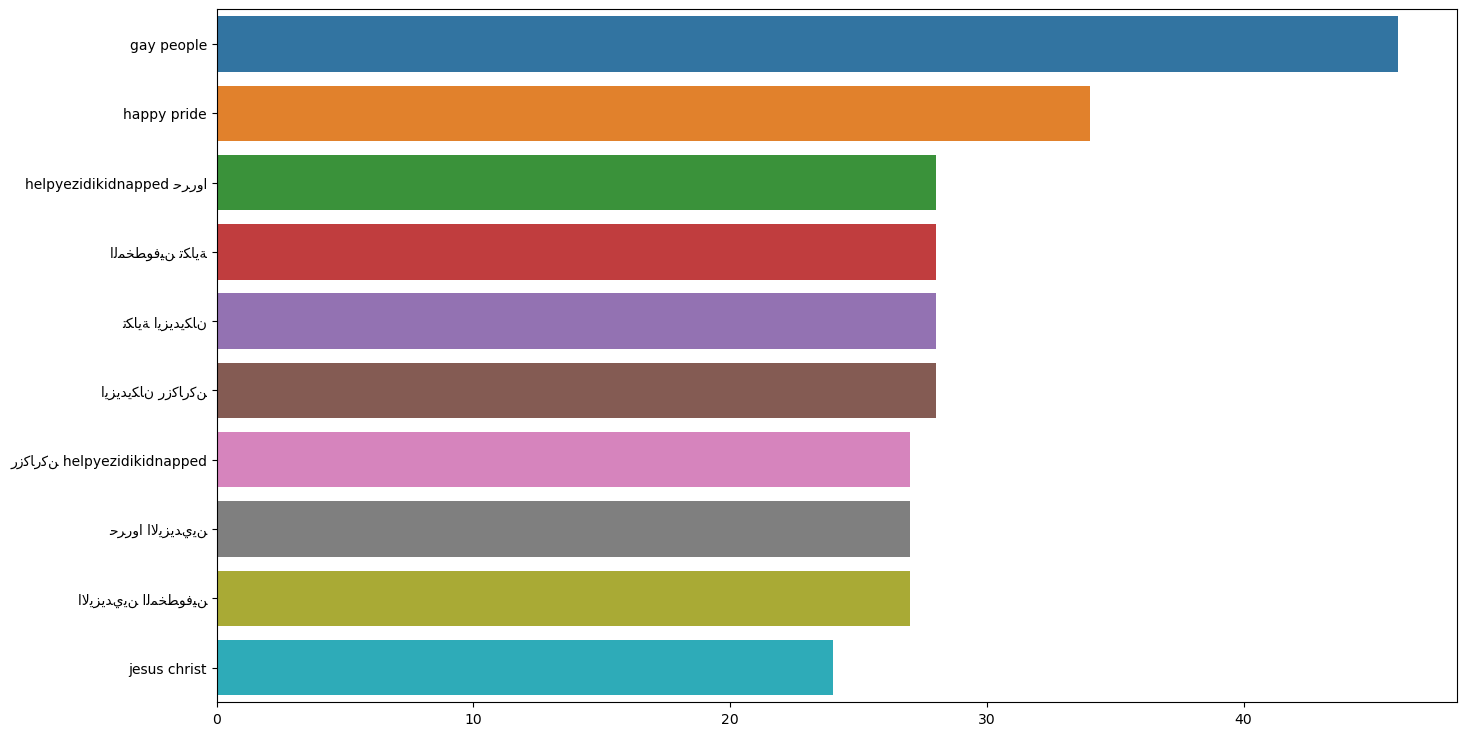

In [30]:
#Bigram analysis in non-offensive texts
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df[df['label']==0]['text'],10,2)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<Axes: >

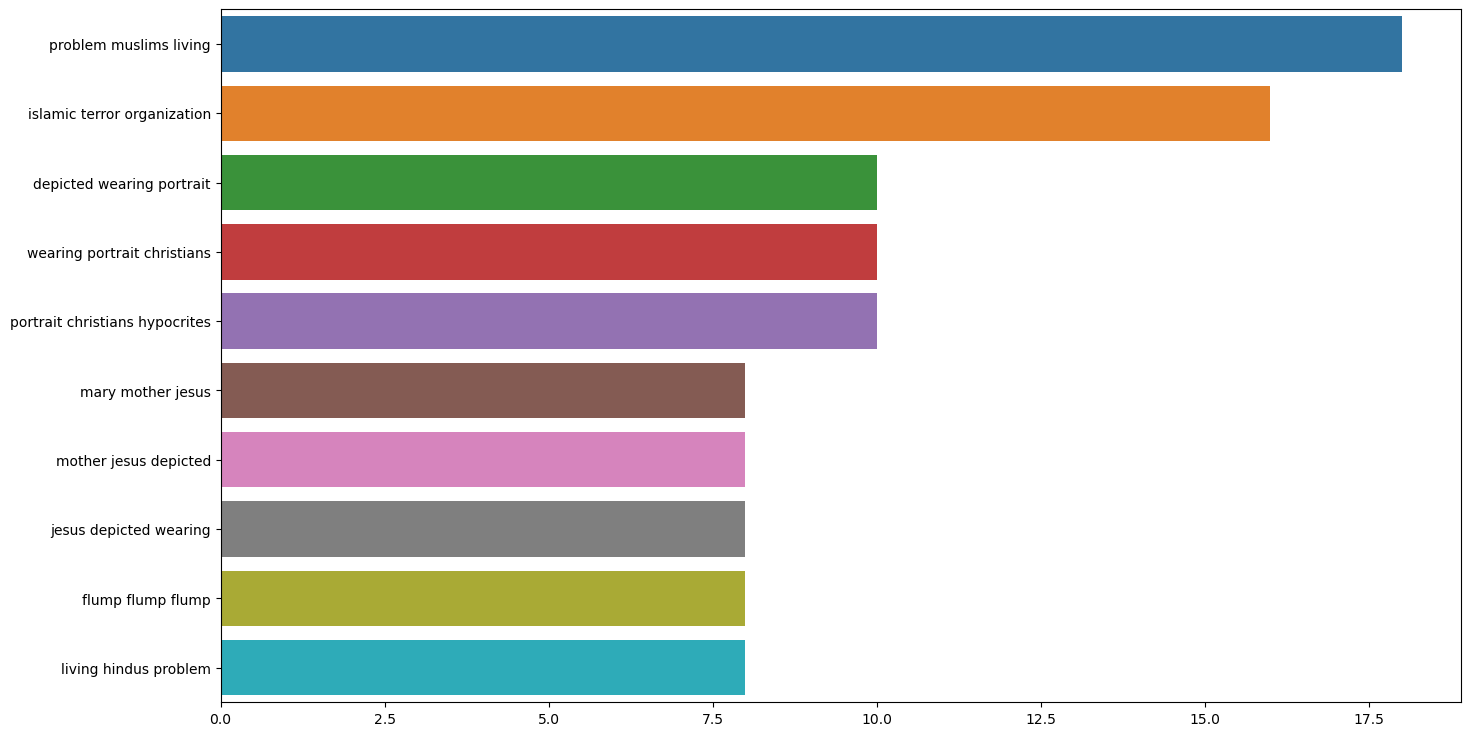

In [31]:
#Trigram analysis in offensive texts
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df[df['label']==1]['text'],10,3)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<Axes: >

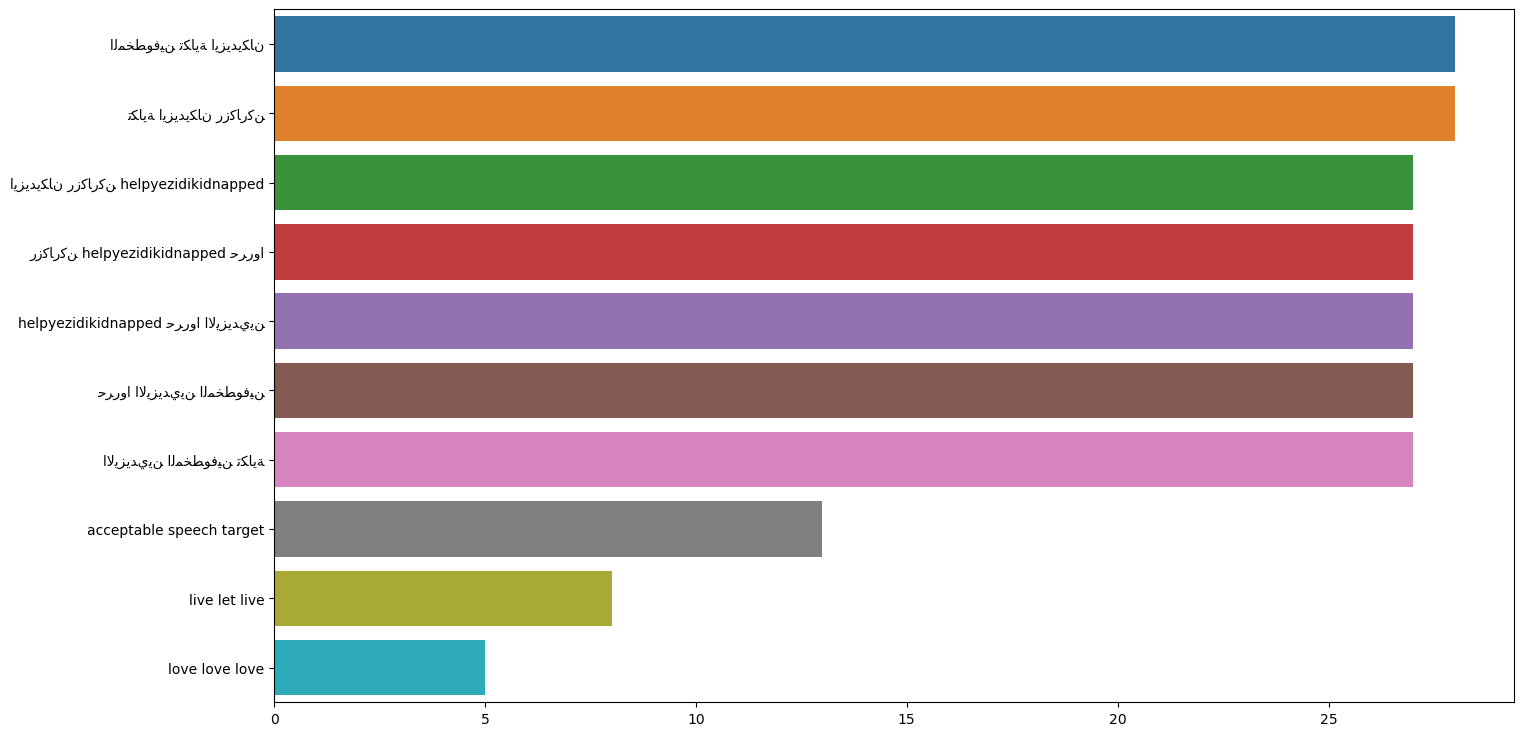

In [32]:
#Trigram analysis in non-offensive texts
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df[df['label']==0]['text'],10,3)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [33]:
# Sample of statistics using nltk
# Another option is defining a function and pass it as a parameter to FunctionTransformer

from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import sent_tokenize, word_tokenize

class LexicalStats (BaseEstimator, TransformerMixin):
    """Extract lexical features from each document"""
    
    def number_sentences(self, doc):
        sentences = sent_tokenize(doc, language='english')
        return len(sentences)

    def fit(self, x, y=None):
        return self

    def transform(self, docs):
        return [{'length': len(doc),
                 'num_sentences': self.number_sentences(doc)}
                for doc in docs]


In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

def custom_tokenizer(words):
    """Preprocessing tokens as seen in the lexical notebook"""
    tokens = word_tokenize(words.lower())
    porter = PorterStemmer()
    lemmas = [porter.stem(t) for t in tokens]
    stoplist = stopwords.words('english')
    lemmas_clean = [w for w in lemmas if w not in stoplist]
    punctuation = set(string.punctuation)
    lemmas_punct = [w for w in lemmas_clean if  w not in punctuation]
    return lemmas_punct

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
from nltk import pos_tag
from collections import Counter 

class PosStats(BaseEstimator, TransformerMixin):
    """Obtain number of tokens with POS categories"""

    def stats(self, doc):
        tokens = custom_tokenizer(doc)
        tagged = pos_tag(tokens, tagset='universal')
        counts = Counter(tag for word,tag in tagged)
        total = sum(counts.values())
        #copy tags so that we return always the same number of features
        pos_features = {'NOUN': 0, 'ADJ': 0, 'VERB': 0, 'ADV': 0, 'CONJ': 0, 
                        'ADP': 0, 'PRON':0, 'NUM': 0}
        
        pos_dic = dict((tag, float(count)/total) for tag,count in counts.items())
        for k in pos_dic:
            if k in pos_features:
                pos_features[k] = pos_dic[k]
        return pos_features
    
    def transform(self, docs, y=None):
        return [self.stats(doc) for doc in docs]
    
    def fit(self, docs, y=None):
        """Returns `self` unless something different happens in train and test"""
        return self

In [36]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer


ngrams_featurizer = Pipeline([
  ('count_vectorizer',  CountVectorizer(ngram_range = (1, 3), encoding = 'ISO-8859-1', 
                                        tokenizer=custom_tokenizer)),
  ('tfidf_transformer', TfidfTransformer())
])

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import NMF, LatentDirichletAllocation

# Define X and Y
X = df['text'].values
y = df['label'].values

## All the steps of the Pipeline should end with a sparse vector as the input data

pipeline = Pipeline([
       ('features', FeatureUnion([
                    ('lexical_stats', Pipeline([
                                ('stats', LexicalStats()),
                                ('vectors', DictVectorizer())
                            ])),
                    ('words', TfidfVectorizer(tokenizer=custom_tokenizer)),
                    ('ngrams', ngrams_featurizer),
                    ('pos_stats', Pipeline([
                                ('pos_stats', PosStats()),
                                ('vectors', DictVectorizer())
                            ])),
                    ('lda', Pipeline([ 
                                ('count', CountVectorizer(tokenizer=custom_tokenizer)),
                                ('lda',  LatentDirichletAllocation(n_components=4, max_iter=5,
                                                       learning_method='online', 
                                                       learning_offset=50.,
                                                       random_state=0))
                            ])),
                ])),
       
        ('clf', MultinomialNB(alpha=.01))  # classifier
    ])

# Using KFold validation

cv = KFold(2, shuffle=True, random_state=33)
scores = cross_val_score(pipeline, X, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\ivana\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\ivana\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Scores in every iteration [0.70078547 0.69783996]
Accuracy: 0.70 (+/- 0.00)


We'll now move onto vectorization!